In [4]:
import numpy as np
import neat
import PIL
import cv2

### **SOW-MKI49-2020-SEM1-V: NeurIPS**
#### Project: Neurosmash

This is the info document on the Neurosmash environment that you will be using for your Final Assignment. It contains background info and skeleton code to get you started.

### Project

During the 2nd period, you will be working exclusively on this final group project in the practicals. You are expected to form groups of 4-5 people. The goal is to take what has been discussed in class and what you have already worked on in the earlier practicals, and apply them on a RL problem in a novel environment. This  project will constitute 25% of your final grade.

Your project grade will be based on the following components:
- Online demonstration
- Source code
- Written report (a 4-page report in NeurIPS workshop paper format: https://www.overleaf.com/latex/templates/neurips-2020/mnshsmqkjsqz)

These components will be evaluated based on performance, creativity, elegance, rigor and plausibility.

While you can use the material from earlier practicals (e.g., REINFORCE, DQN, etc.) as a boilerplate, you are also free to take any other approach be it imitation learning or world models for your project.

As a deep learning library, use of mxnet is preferred. Still, you are free to use whatever you want.

In addition to the practical sessions, we will provide additional support in the coming weeks. You can email any of us to set up an appointment for discussing your project.

### Environment

Briefly, there are two agents: Red and Blue. Red is controlled by you. Blue is controlled by the environment "AI".* Both agents always run forward with a speed of 3.5 m/s*. If one of them gets within the reach of the other (a frontal sphere with 0.5 m radius), it gets pushed away automatically with a speed of 3.5 m/s. The only thing that the agents can do is to turn left or right with an angular speed of 180 degrees/s. This means that there are three possible discrete actions that your agent can take every step: Turn nowhere, turn left and turn right. For convenience, there is also a fourth built-in action which turns left or right with uniform probability. An episode begins when you reset the environment and ends when one of the agents fall off the platform. At the end of the episode, the winning agent gets a reward of 10 while the other gets nothing. Therefore, your goal is to train an agent who can maximize its reward by pushing the other agent off the platform or making it fall off the platform by itself.

* Note that all times are simulation time. That is, 0.02 s per step when timescale is set to one.

* Basically, Blue is artificial but not really intelligent. What it does is that every 0.5 s, it updates its destination to the current position of Red plus some random variation (a surrounding circle with a radius of 1.75 m) and smoothly turns to that position.

Note to macOS users: You should first make the environment executable* in the terminal and run it from the context menu (i.e., not by double clicking)

* chmod -R +x [Path of Mac.app (which is in the .zip file)]/Contents/MacOS

### Skeleton code

- You should first add the Neurosmash file to your working directory or Python path.
- Next you should start the Neurosmash app 
- Make sure to set the right values in the Ip, Port, Size and Timescale fields (see below). These must correspond to the values you specify in the python script
- Start the server by pressing the play button
- The fastest simulations can be obtained by turning off rendering (x button)

In [97]:
import Neurosmash

# These are the default environment arguments. They must be the same as the values that are set in the environment GUI.
ip         = "127.0.0.1" # Ip address that the TCP/IP interface listens to (127.0.0.1 by default)
port       = 13000       # Port number that the TCP/IP interface listens to (13000 by default)

# This is the size of the texture that the environment is rendered.
# This is set to 784 by default, which will result in a crisp image but slow speed.
# You can change the size to a value that works well for your environment but should not go too low.
size       = 360

# This is the simulation speed of the environment. This is set to 1 by default.
# Setting it to n will make the simulation n times faster.
# In other words, less (if n < 1) or more (if n > 1) simulation time will pass per step.
# You might want to increase this value to around 10 if you cannot train your models fast enough
# so that they can sample more states in a shorter number of steps at the expense of precision.
timescale  = 20

# This is an example agent.
# It has a step function, which gets reward/state as arguments and returns an action.
# Right now, it always outputs a random action (3) regardless of reward/state.
# The real agent should output one of the following three actions:
# none (0), left (1) and right (2)
agent = Neurosmash.Agent() 

# This is the main environment.
# It has a reset function, which is used to reset the environment before episodes.
# It also has a step function, which is used to which steps one time point
# It gets an action (as defined above) as input and outputs the following:
# end (true if the episode has ended, false otherwise)
# reward (10 if won, 0 otherwise)
# state (flattened size x size x 3 vector of pixel values)
# The state can be converted into an image as follows:
# image = np.array(state, "uint8").reshape(size, size, 3)
# You can also use to Neurosmash.Environment.state2image(state) function which returns
# the state as a PIL image
environment = Neurosmash.Environment(ip, port, size, timescale) 



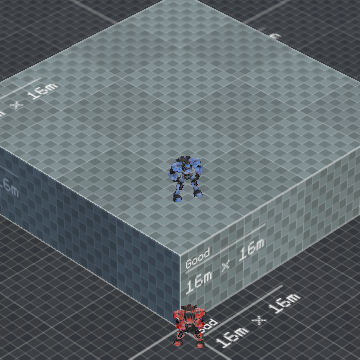

In [98]:
# The following steps through an entire episode from start to finish with random actions (by default)

end, reward, state = environment.reset()

while (end == 0):
    action = agent.step(end, reward, state)
    end, reward, state = environment.step(action)

# Let's run it a few more steps so that the things have time to settle down

for i in range(1):
    action = agent.step(end, reward, state)
    end, reward, state = environment.step(action)

environment.state2image(state)

In [108]:
def get_color_coords(image):
    boundaries = [
    ([17, 15, 130], [80, 100, 200]), #Blue
    ([86, 31, 4], [220, 88, 50]), #Red
    ]
    coords = []
    for (lower, upper) in boundaries:
        # create NumPy arrays from the boundaries
        lower = np.array(lower, dtype = "uint8")
        upper = np.array(upper, dtype = "uint8")
        # find the colors within the specified boundaries and apply
        # the mask
        mask = cv2.inRange(image, lower, upper)
        output = cv2.bitwise_and(image, image, mask = mask)
        coords.append(np.mean(np.array(list(set(zip(np.nonzero(output)[0],np.nonzero(output)[1])))), axis = 0))
    for idx in range(len(coords)):
        if np.isnan(coords[idx]).all():
            coords[idx] = np.array([0,0])
    return np.array(coords)-size/2

In [112]:
# Let's also do it step by step while displaying the state

end, reward, state = environment.reset()
for _ in range(100):
    environment.state2image(state)
    image = np.array(state, "uint8").reshape(size, size, 3)
    coords = get_color_coords(image)
    print(f"Red: {coords[1]} \tBlue: {coords[0]}", end = '\r')
    action = agent.step(end, reward, state)
    end, reward, state = environment.step(action)


KeyboardInterrupt: 

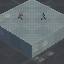

In [102]:
action = agent.step(end, reward, state)
end, reward, state = environment.step(action)

environment.state2image(state)

In [113]:
def eval_genomes(genomes, config):
    step_weight = 0.01
    for genome_id, genome in genomes:
        print(f"Genome {genome_id}")
        genome.fitness = 0  # start with fitness level of 0
        net = neat.nn.FeedForwardNetwork.create(genome, config)
        for _ in range(3):
            print(f"#", end = " ")
            end, reward, state = environment.reset()
            steps = 0
            while (end == 0 and steps < 100):
                image = np.array(state, "uint8").reshape(size, size, 3)
                action = np.argmax(net.activate(get_color_coords(image).flatten()))
                steps += 1
                end, reward, state = environment.step(action)
            genome.fitness += reward-steps*step_weight
        print(f"Fitness: {genome.fitness}")
        print()

In [114]:
def run(config_file):
    end, reward, state = environment.reset()
    config = neat.config.Config(neat.DefaultGenome, neat.DefaultReproduction,
                         neat.DefaultSpeciesSet, neat.DefaultStagnation,
                         config_file)

    # Create the population, which is the top-level object for a NEAT run.
    p = neat.Population(config)

    # Add a stdout reporter to show progress in the terminal.
    p.add_reporter(neat.StdOutReporter(True))
    stats = neat.StatisticsReporter()
    p.add_reporter(stats)
    #p.add_reporter(neat.Checkpointer(5))

    # Run for up to 50 generations.
    winner = p.run(eval_genomes, 50)

    # show final stats
    print('\nBest genome:\n{!s}'.format(winner))


config_path ='config-feedforward.txt'
run(config_path)
    


 ****** Running generation 0 ****** 

Genome 1
# # # Fitness: 9.110000000000001

Genome 2
# # # Fitness: -0.45000000000000007

Genome 3
# # # Fitness: -0.64

Genome 4
# # # Fitness: 9.399999999999999

Genome 5
# # # Fitness: -2.08

Genome 6
# # # Fitness: 7.09

Genome 7
# # # Fitness: 17.53

Genome 8
# # # Fitness: 7.33

Genome 9
# # # Fitness: 17.92

Genome 10
# # # Fitness: -0.7

Population's average fitness: 6.45100 stdev: 7.02176
Best fitness: 17.92000 - size: (13, 70) - species 9 - id 9
Average adjusted fitness: 0.427
Mean genetic distance 3.294, standard deviation 0.991
Population of 20 members in 10 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0     2      9.1    0.560     0
     2    0     2     -0.5    0.081     0
     3    0     2     -0.6    0.072     0
     4    0     2      9.4    0.574     0
     5    0     2     -2.1    0.000     0
     6    0     2      7.1    0.459     0
     7    0     2     17.5    0.980     

# # # Fitness: -0.61

Genome 12
# # # Fitness: -0.81

Genome 2
# # # Fitness: -0.54

Genome 14
# # # Fitness: -0.44000000000000006

Genome 13
# # # Fitness: -0.24

Genome 3
# # # Fitness: -0.5800000000000001

Genome 16
# # # Fitness: -1.54

Genome 8
# # # Fitness: 18.04

Genome 5
# # # Fitness: -1.4100000000000001

Genome 11
# # # Fitness: 7.300000000000001

Genome 15
# # # Fitness: -3.0

Genome 6
# # # Fitness: 17.52

Genome 19
# # # Fitness: 18.22

Genome 7
# # # Fitness: 7.76

Genome 9
# # # Fitness: 18.24

Genome 20
# # # Fitness: 18.46

Genome 1
# # # Fitness: 9.39

Genome 17
# # # Fitness: 8.03

Genome 4
# # # Fitness: -0.66

Genome 18
# # # Fitness: 7.33

Population's average fitness: 6.02300 stdev: 7.89902
Best fitness: 18.46000 - size: (13, 68) - species 9 - id 20
Average adjusted fitness: 0.420
Mean genetic distance 3.294, standard deviation 0.991
Population of 20 members in 10 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1

# # # Fitness: 7.35

Genome 15
# # # Fitness: 7.34

Genome 11
# # # Fitness: 18.56

Genome 5
# # # Fitness: -1.22

Genome 7
# # # Fitness: 18.04

Genome 19
# # # Fitness: 7.470000000000001

Population's average fitness: 6.29900 stdev: 8.75484
Best fitness: 29.46000 - size: (13, 70) - species 4 - id 4
Average adjusted fitness: 0.286
Mean genetic distance 3.294, standard deviation 0.991
Population of 20 members in 10 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   11     2      7.0    0.176     9
     2   11     2     -0.4    0.078     9
     3   11     2      9.5    0.236     0
     4   11     2     29.5    0.500     0
     5   11     2     18.6    0.360     2
     6   11     2      7.3    0.319     4
     7   11     2     18.0    0.485     1
     8   11     2     17.9    0.329     9
     9   11     2      7.0    0.155     4
    10   11     2      9.2    0.227    10
Total extinctions: 0
Generation time: 538.990 sec (489.095 average)


# # # Fitness: -1.6600000000000001

Genome 17
# # # Fitness: -1.58

Genome 2
# # # Fitness: -0.45999999999999996

Genome 14
# # # Fitness: -0.5

Genome 13
# # # Fitness: -0.24

Genome 3
# # # Fitness: 9.42

Genome 11
# # # Fitness: 29.36

Genome 5
# # # Fitness: 8.57

Genome 4
# # # Fitness: 9.49

Genome 18
# # # Fitness: -3.0

Genome 12
# # # Fitness: 9.33

Genome 10
# # # Fitness: -0.54

Genome 15
# # # Fitness: -2.23

Genome 6
# # # Fitness: 18.04

Genome 8
# # # Fitness: 8.26

Genome 16
# # # Fitness: 18.619999999999997

Genome 7
# # # Fitness: 17.57

Genome 19
# # # Fitness: -3.0

Genome 20
# # # Fitness: 7.01

Genome 9
# # # Fitness: 17.82

Population's average fitness: 7.01400 stdev: 9.11642
Best fitness: 29.36000 - size: (13, 71) - species 5 - id 11
Average adjusted fitness: 0.309
Mean genetic distance 3.294, standard deviation 0.991
Population of 20 members in 10 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   17     2     

# # # Fitness: -2.62

Genome 8
# # # Fitness: 9.08

Genome 16
# # # Fitness: -2.17

Genome 20
# # # Fitness: 17.92

Genome 9
# # # Fitness: 7.6899999999999995

Genome 4
# # # Fitness: 9.6

Genome 18
# # # Fitness: 17.35

Population's average fitness: 5.99300 stdev: 6.81514
Best fitness: 18.64000 - size: (13, 71) - species 5 - id 11

Species 2 with 2 members is stagnated: removing it

Species 1 with 2 members is stagnated: removing it
Average adjusted fitness: 0.469
Mean genetic distance 3.198, standard deviation 1.086
Population of 16 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     3   22     2     -0.3    0.120     9
     4   22     2     17.4    0.761    11
     5   22     2     18.6    0.781     5
     6   22     2      8.1    0.496     9
     7   22     2      7.1    0.233    12
     8   22     2      9.1    0.298    10
     9   22     2     17.9    0.730     1
    10   22     2      9.4    0.334     4
Total extinctions

# # # Fitness: 28.209999999999997

Genome 5
# # # Fitness: 8.33

Genome 11
# # # Fitness: 17.77

Population's average fitness: 10.78813 stdev: 8.59985
Best fitness: 28.21000 - size: (13, 68) - species 9 - id 20
Average adjusted fitness: 0.397
Mean genetic distance 3.198, standard deviation 1.086
Population of 16 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     3   28     2      9.5    0.183    15
     4   28     2      9.3    0.311    17
     5   28     2     17.8    0.475    11
     6   28     2      7.6    0.277    15
     7   28     2     28.0    0.806    18
     8   28     2      8.2    0.295    16
     9   28     2     28.2    0.822     3
    10   28     2     -0.5    0.003    10
Total extinctions: 0
Generation time: 337.634 sec (411.289 average)

 ****** Running generation 29 ****** 

Genome 10
# # # Fitness: 9.579999999999998

Genome 12
# # # Fitness: 9.08

Genome 6
# # # Fitness: 7.68

Genome 15
# # # Fitness: 17.14


# # # Fitness: 17.67

Genome 23
# # # Fitness: 18.090000000000003

Genome 24
# # # Fitness: 7.52

Population's average fitness: 12.18400 stdev: 8.70064
Best fitness: 27.85000 - size: (13, 68) - species 9 - id 20
Average adjusted fitness: 0.429
Mean genetic distance 2.845, standard deviation 1.350
Population of 10 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     5   35     2      8.9    0.319    18
     6   35     3     18.1    0.559    22
     9   35     3     27.9    0.831    10
    10   35     2     -0.4    0.009    17
Total extinctions: 0
Generation time: 265.677 sec (327.305 average)

 ****** Running generation 36 ****** 

Genome 10
# # # Fitness: -0.7300000000000001

Genome 12
# # # Fitness: -0.6200000000000001

Genome 5
# # # Fitness: -2.15

Genome 11
# # # Fitness: 28.36

Genome 23
# # # Fitness: 27.869999999999997

Genome 21
# # # Fitness: 18.0

Genome 25
# # # Fitness: 28.720000000000002

Genome 20
# # # Fitness: 7.

# # # Fitness: 7.5

Genome 61
# # # Fitness: 8.15

Genome 62
# # # Fitness: -2.88

Genome 63
# # # Fitness: 17.91

Genome 64
# # # Fitness: -3.0

Population's average fitness: 7.83000 stdev: 6.60674
Best fitness: 17.91000 - size: (11, 41) - species 6 - id 63
Average adjusted fitness: 0.521
Mean genetic distance 1.994, standard deviation 1.371
Population of 10 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     6   44     5     17.9    0.507    31
     9   44     5      8.9    0.535     3
Total extinctions: 0
Generation time: 320.508 sec (271.281 average)

 ****** Running generation 45 ****** 

Genome 40
# # # Fitness: 17.97

Genome 57
# # # Fitness: 18.53

Genome 65
# # # Fitness: 28.65

Genome 66
# # # Fitness: 17.87

Genome 67
# # # Fitness: -0.4

Genome 63
# # # Fitness: 7.9

Genome 47
# # # Fitness: 17.96

Genome 68
# # # Fitness: 7.390000000000001

Genome 69
# # # Fitness: 28.57

Genome 70
# # # Fitness: 28.240000000000002